In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#read in the data
df = pd.read_csv("Iris.csv")

In [3]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [4]:
df['setosa'] = 0
df.loc[df['Species'] == 'Iris-setosa', 'setosa'] = 1
df['versicolor'] = 0
df.loc[df['Species'] == 'Iris-versicolor', 'versicolor'] = 1
df['virginica'] = 0
df.loc[df['Species'] == 'Iris-virginica', 'virginica'] = 1

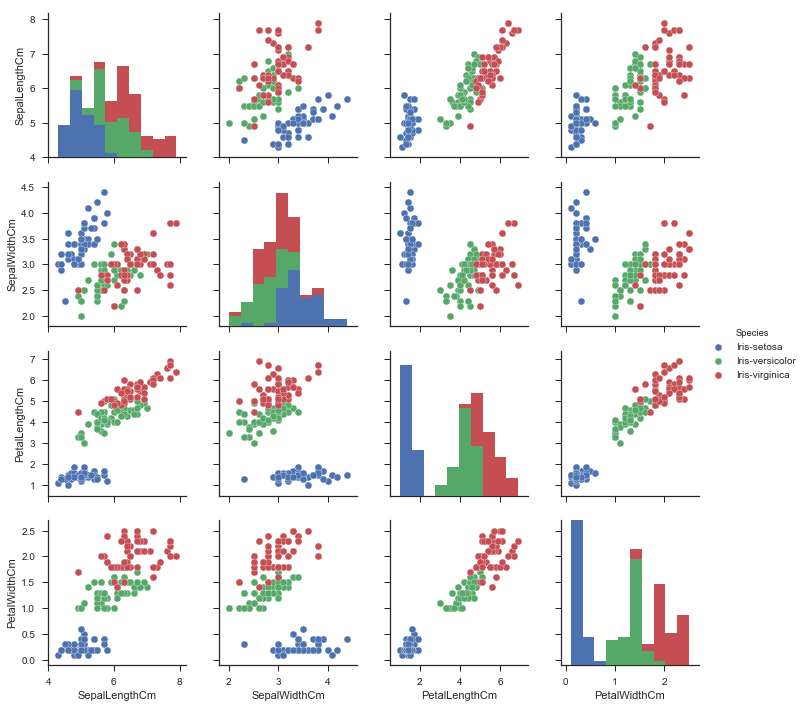

In [5]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], 
                 hue = 'Species')
plt.show()

In [6]:
df['Sepal'] = df['SepalLengthCm'] * df['SepalWidthCm']
df['Petal'] = df['PetalLengthCm'] * df['PetalWidthCm']

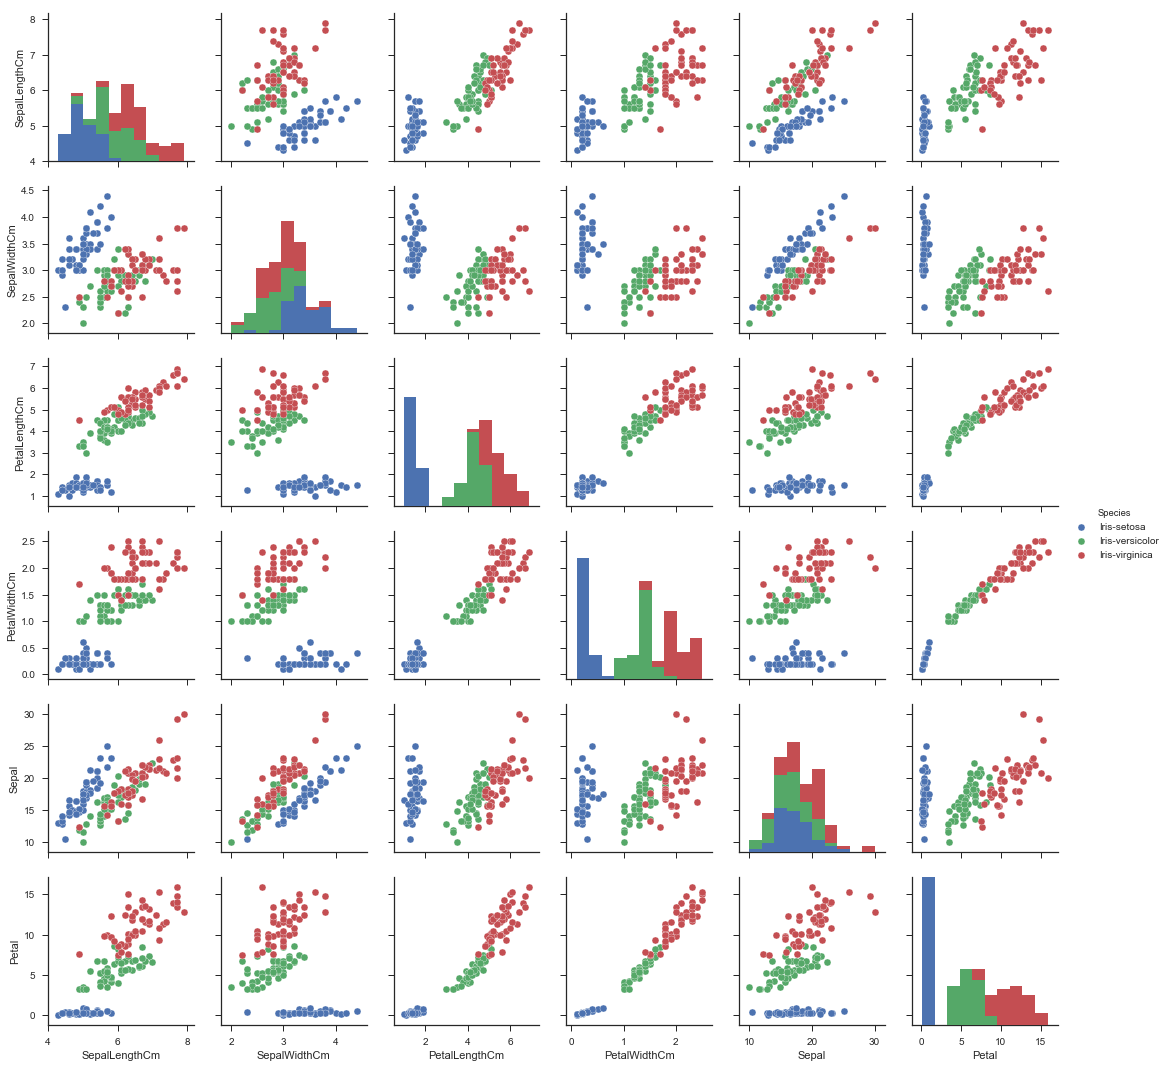

In [7]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Sepal', 'Petal', 'Species']], 
                 hue = 'Species')
plt.show()

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
itrain1, itest = train_test_split(range(df.shape[0]), train_size=0.8)
itrain, icross = train_test_split(itrain1, train_size=0.75)
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Sepal', 'Petal']].values
y = df[['setosa', 'versicolor', 'virginica']].values
y[:,2]
xtrain1= x[itrain1]
ytrain1 = y[itrain1]
xtest= x[itest]
ytest = y[itest]
xtrain= x[itrain]
ytrain = y[itrain]
xcross= x[icross]
ycross = y[icross]

In [10]:
print (ytrain.sum(axis=0))
print (ycross.sum(axis=0))
print (ytest.sum(axis=0))

[31 26 33]
[10  9 11]
[ 9 15  6]


In [11]:
def cv_score(clf, xtrain, ytrain, xcross, ycross, score_func=accuracy_score):
    clf.fit(xtrain, ytrain) # fit
    result = score_func(clf.predict(xcross), ycross) # evaluate score function on held-out data
    return result 

In [12]:
def predict(clf, x, threshold):
    params = np.transpose(clf.coef_)
    odds = np.exp(np.dot(x, params))
    prob = odds / (1 + odds)
    pred = [1 if i >= threshold else 0 for i in prob]
    return pred

In [13]:
def prob(clf, x):
    params = np.transpose(clf.coef_)
    odds = np.exp(np.dot(x, params))
    prob = odds / (1 + odds)
    return prob

In [14]:
pred = []
pred_test = []
Cs = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
from sklearn.linear_model import LogisticRegression
max_score = 0
for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(clf, xtrain, ytrain[:,0], xcross, ycross[:,0])
        if score > max_score:
            max_score = score
            best_C =C
print (max_score, best_C)        

1.0 0.003


In [15]:
clfl=LogisticRegression(C=best_C)
score = cv_score(clf, xtrain, ytrain[:,0], xtest, ytest[:,0])
score

1.0

In [16]:
pred = []
pred_test = []
for i in range(3):
    Cs = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
    from sklearn.linear_model import LogisticRegression
    max_score = 0
    for C in Cs:
            clf = LogisticRegression(C=C)
            score = cv_score(clf, xtrain, ytrain[:,i], xcross, ycross[:,i])
            if score > max_score:
                max_score = score
                best_C =C
    print (max_score, best_C)    
    clfl=LogisticRegression(C=best_C)
    clfl.fit(xtrain1, ytrain1[:,i])
    ypred = prob(clfl, xtrain1)
    ypred = [item for sublist in ypred for item in sublist]
    ypred_test = prob(clfl, xtest)
    ypred_test = [item for sublist in ypred_test for item in sublist]
    pred.append(ypred)
    pred_test.append(ypred_test)    

1.0 0.003
0.966666666667 30
1.0 0.1


In [17]:
pred = np.transpose(pred)
pred_test = np.transpose(pred_test)
max_pred = pred.max(1)
max_pred_test = pred_test.max(1)
m, n = np.shape(pred)
e, f = np.shape(pred_test)

In [18]:
for i in range(m):
    for j in range(n):
        pred[i,j] = 1*(pred[i,j] == max_pred[i])
for i in range(e):
    for j in range(f):
        pred_test[i,j] = 1*(pred_test[i,j] == max_pred_test[i])

In [19]:
pred == ytrain1
1*(pred_test == ytest)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 0],
       [1, 1, 1],
       [1, 1, 1]])

In [20]:
print (accuracy_score(pred_test, ytest))

0.966666666667
